In [ ]:
import pandas as pd
import scanpy as sc

# Load the dropout matrix (rows: genes, columns: cells) and immediately transpose
counts = pd.read_csv('..\..\data/S10000/noise_dropout_0.2.csv', index_col=0).T

# Now counts has rows=cells, cols=genes, just like Scanpy expects
adata = sc.AnnData(counts)

# Load integer-indexed labels
labels = pd.read_csv(
    '..\..\data/S10000/symsim_labels_2000genes_10000cells_simple.csv',
    index_col=0
)

adata.obs.index = adata.obs.index.str.lstrip('X').astype(int)

adata.obs['cell_class'] = labels.reindex(adata.obs.index)['x'].astype(str)

In [ ]:
#SANITY CHECKS
print("adata shape:", adata.shape)
print(adata.obs['cell_class'].value_counts(dropna=False))
print(adata)

adata shape: (10000, 2000)
cell_class
3    3334
1    3333
2    3333
Name: count, dtype: int64
AnnData object with n_obs × n_vars = 10000 × 2000
    obs: 'cell_class'


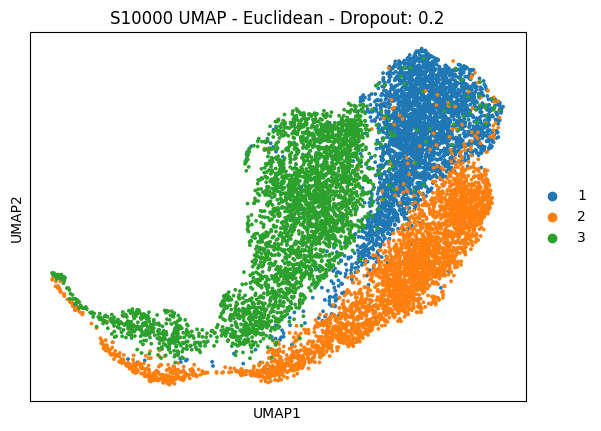

In [6]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='euclidean')
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Euclidean - Dropout: 0.2")

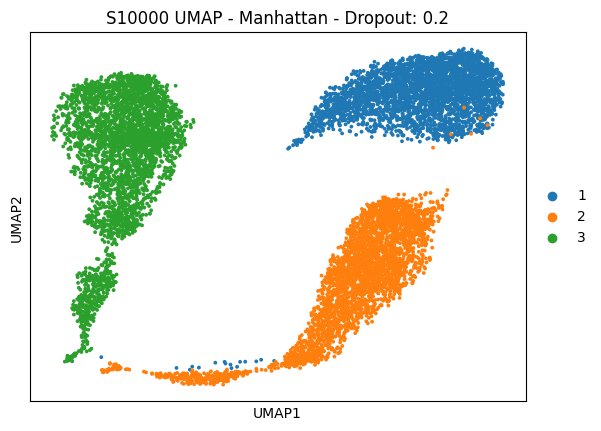

In [7]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='manhattan')
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Manhattan - Dropout: 0.2")

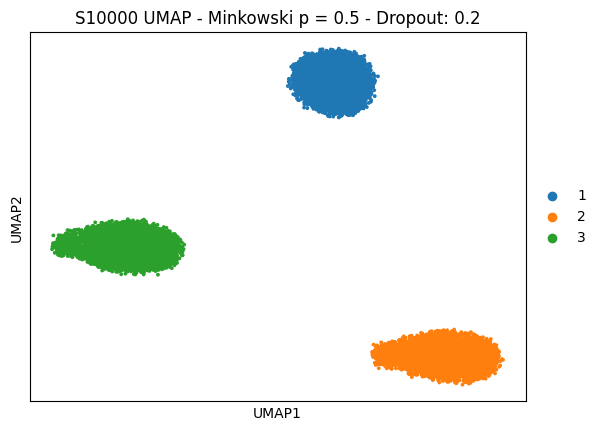

In [9]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='minkowski', metric_kwds={'p': 0.5})
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Minkowski p = 0.5 - Dropout: 0.2")

In [ ]:
import pandas as pd
import scanpy as sc

# Load the dropout matrix (rows: genes, columns: cells) and immediately transpose
counts = pd.read_csv('..\..\data/S10000/noise_dropout_0.8.csv', index_col=0).T

# Now counts has rows=cells, cols=genes, just like Scanpy expects
adata = sc.AnnData(counts)

# Load your integer-indexed labels
labels = pd.read_csv(
    '..\..\data/S10000/symsim_labels_2000genes_10000cells_simple.csv',
    index_col=0
)

adata.obs.index = adata.obs.index.str.lstrip('X').astype(int)

adata.obs['cell_class'] = labels.reindex(adata.obs.index)['x'].astype(str)

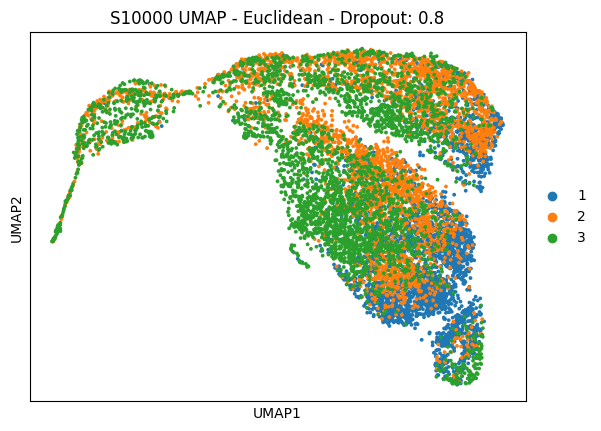

In [12]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='euclidean')
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Euclidean - Dropout: 0.8")

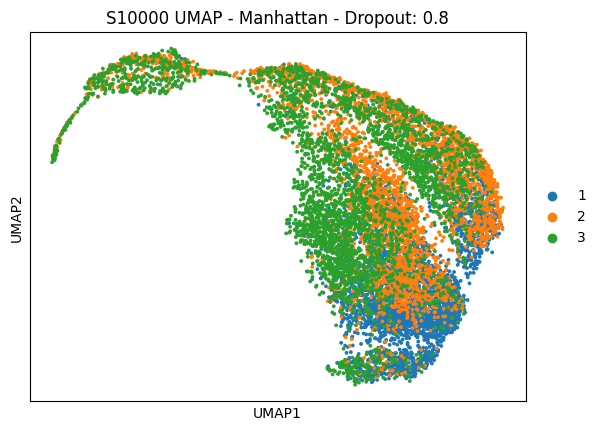

In [13]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='manhattan')
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Manhattan - Dropout: 0.8")

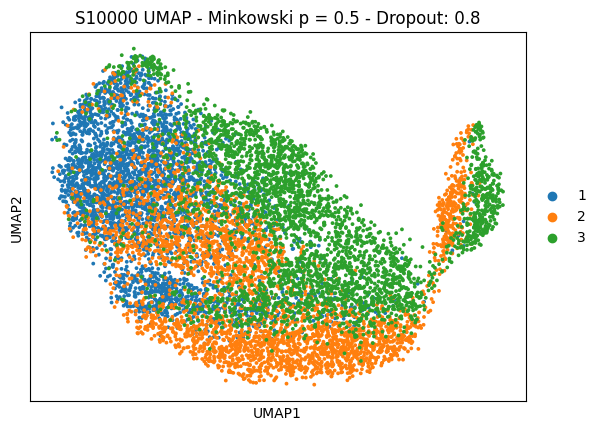

In [14]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='minkowski', metric_kwds={'p': 0.5})
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color="cell_class", size=30, title="S10000 UMAP - Minkowski p = 0.5 - Dropout: 0.8")